In [18]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import torch

from nionswift_plugin.nionswift_structure_recognition.model import load_preset_model
from nionswift_plugin.nionswift_structure_recognition.scale import RealSpaceCalibrator

from tqdm.auto import tqdm
from psm.graph import stable_delaunay_graph
from psm.rmsd import pairwise_rmsd
from psm.geometry import regular_polygon
from psm.select import select_nodes_in_faces, select_faces_around_nodes
from psm.structures.graphene import defect_fingerprint, assign_sublattice
from nionswift_plugin.nionswift_event_analyzer.events import SublatticeOccupancy
from skimage.transform import downscale_local_mean
from skimage.io import imread

#import os
#os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
device=torch.device('cpu')
#device = torch.device('cuda:0')
model = load_preset_model('graphene')

C:\w\1\s\tmp_conda_3.7_104508\conda\conda-bld\pytorch_1572950778684\work\aten\src\ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
C:\w\1\s\tmp_conda_3.7_104508\conda\conda-bld\pytorch_1572950778684\work\aten\src\ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.


In [35]:
#image = np.load('test_image.npy')[:100,:100]
images = imread('VCR stack (MAADF) Atom35.tif')

In [36]:
output = model.predict_series(images, .028)

15 of 136 frames processed
29 of 136 frames processed
42 of 136 frames processed
56 of 136 frames processed
70 of 136 frames processed
83 of 136 frames processed
97 of 136 frames processed
110 of 136 frames processed
124 of 136 frames processed
all frames processed


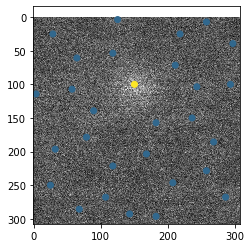

In [37]:
i=80
plt.imshow(images[i],cmap='gray')
plt.scatter(*output[i]['points'].T,c=output[i]['labels'],vmin=0,vmax=3)

In [38]:
a = SublatticeOccupancy(3, 1.42 / .028)

a.analyze_sequence(output)


In [39]:
a._data

[(0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 1),
 (0, 0),
 (1, 0),
 (1, 0),
 (1, 1),
 (1, 0),
 (1, 0),
 (0, 1),
 (1, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (1, 0),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (1, 0),
 (0, 1),
 (1, 0),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (1, 0),
 (1, 0),
 (0, 1),
 (0, 1),
 (0, 1),
 (1, 0),
 (0, 1),
 (1, 0),
 (1, 0),
 (1, 0),
 (0, 1),
 (0, 1),
 (1, 0),
 (0, 1),
 (1, 0),
 (0, 1),
 (1, 0),
 (1, 0),
 (0, 1),
 (1, 0),
 (1, 0),
 (1, 0),
 

In [15]:
for i, frame in enumerate(output):
    assign_sublattice(frame['points'], 1.42 / .028)

In [7]:
#for i in tqdm(range(1000)):
output = model(image, .028)

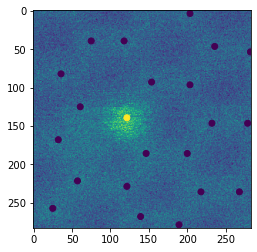

In [8]:
plt.scatter(*output['points'].T, c=output['labels'])
plt.imshow(image)

In [20]:
torch.cuda.max_memory_allocated(device=device) #* 1e-9

1448010752

59.978535


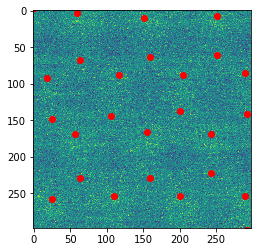

In [53]:

output = model(image, .02833)

points = output['points']
density = output['density']

plt.plot(*points.T,'ro')
plt.imshow(image)
#image.shape

56.548667764616276

In [48]:
#from skimage.filters import threshold_otsu

t = torch.tensor(image)

threshold_otsu(t)

#print(bin_centers)


#plt.plot(hist.numpy())

# hist = hist.astype(float)

# # class probabilities for all possible thresholds
# weight1 = np.cumsum(hist)
# weight2 = np.cumsum(hist[::-1])[::-1]
# # class means for all possible thresholds
# mean1 = np.cumsum(hist * bin_centers) / weight1
# mean2 = (np.cumsum((hist * bin_centers)[::-1]) / weight2[::-1])[::-1]

# # Clip ends to align class 1 and class 2 variables:
# # The last value of ``weight1``/``mean1`` should pair with zero values in
# # ``weight2``/``mean2``, which do not exist.
# variance12 = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2

# idx = np.argmax(variance12)
# threshold = bin_centers[:-1][idx]

#t

6.1006317138671875

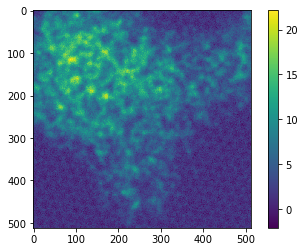

In [41]:
plt.imshow(image)
plt.colorbar()

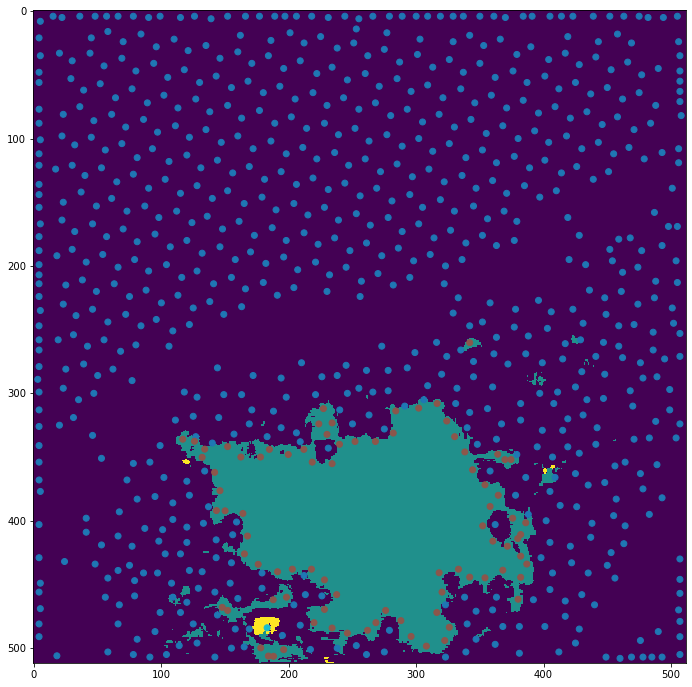

In [17]:
#for i in tqdm(range(100)):
sampling = .1
output = model(image, sampling)

segmentation = output['segmentation']
points = output['points']
labels = output['labels']

plt.figure(figsize=(12,12))
plt.imshow(segmentation)
plt.scatter(*points.T,c=labels,cmap='tab10')